In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"Heart.csv")

In [4]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [5]:
df.ChestPain.unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [6]:
df.Thal.unique()

array(['fixed', 'normal', 'reversable', nan], dtype=object)

In [7]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

## plotting of data

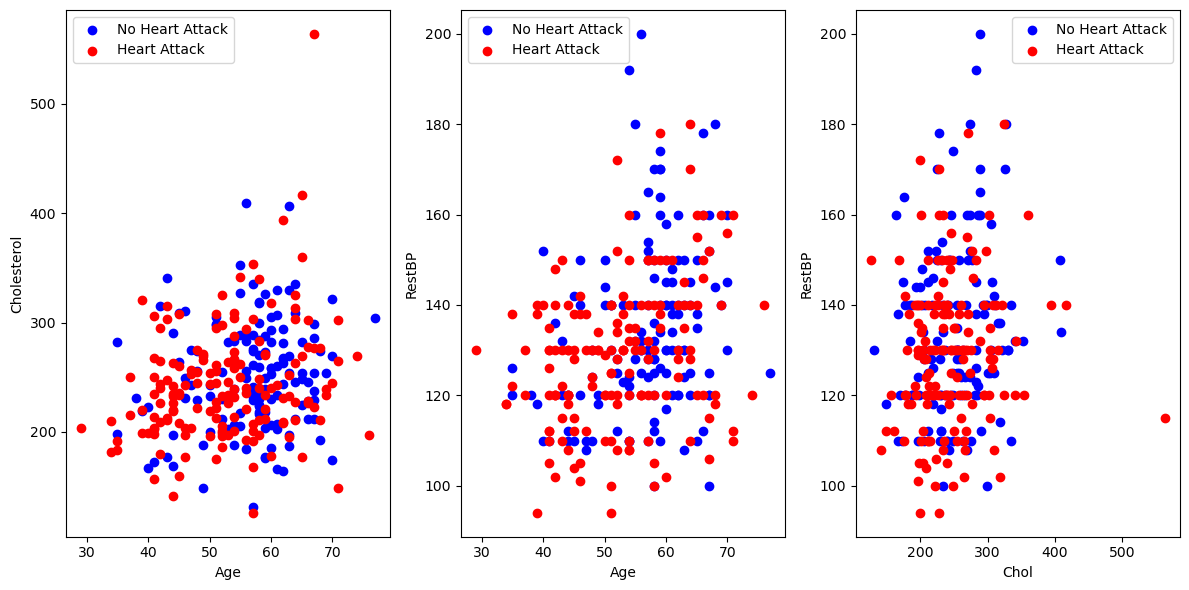

In [10]:
plt.figure(figsize = (12,6))
plt.subplot(1,3,1)
plt.scatter(df[df['AHD'] == 'Yes']['Age'],df[df['AHD'] == 'Yes']['Chol'],color = 'blue',label = 'No Heart Attack')
plt.scatter(df[df['AHD'] == 'No']['Age'],df[df['AHD'] == 'No']['Chol'],color = 'red',label = 'Heart Attack')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(df[df['AHD'] == 'Yes']['Age'],df[df['AHD'] == 'Yes']['RestBP'],color = 'blue',label = 'No Heart Attack')
plt.scatter(df[df['AHD'] == 'No']['Age'],df[df['AHD'] == 'No']['RestBP'],color = 'red',label = 'Heart Attack')
plt.xlabel('Age')
plt.ylabel('RestBP')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(df[df['AHD'] == 'Yes']['Chol'],df[df['AHD'] == 'Yes']['RestBP'],color = 'blue',label = 'No Heart Attack')
plt.scatter(df[df['AHD'] == 'No']['Chol'],df[df['AHD'] == 'No']['RestBP'],color = 'red',label = 'Heart Attack')
plt.xlabel('Chol')
plt.ylabel('RestBP')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
def TrainTestSplit(X,Y,test_size):
    idx = np.random.permutation(np.arange(Y.size))
    tS = int(np.floor(test_size*Y.size)) 
    trainIdx = idx[tS:]
    testIdx  = idx[:tS]
    Xtrain = X[trainIdx,:]
    Ytrain = Y[trainIdx]
    Xtest  = X[testIdx,:]
    Ytest  = Y[testIdx]
    return Xtrain,Ytrain,Xtest,Ytest

In [12]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [13]:
X1 = np.array(df['Age'])
X2 = np.array(df['Chol'])
X  = np.hstack((X1,X2)).reshape(297,2)
Y = np.array(df['AHD'])

In [14]:
Xtrain,Ytrain,Xtest,Ytest = TrainTestSplit(X,Y,0.25)

In [15]:
print(Xtrain.shape, Ytrain.shape,Xtest.shape,Ytest.shape)

(223, 2) (223,) (74, 2) (74,)
